# DUMMY VERSION: Preprocessing of Data from DaNewsRoom
Preprocessing of the DaNewsRoom datasetfor the Cultural Data Science Project. This is not the full version, but rather just a demonstration using dummy data. We refer to the data-preprocessing.ipynb file for the actual pre-processing script
2022 by @drasbaek and @MinaAlmasi

[DaNewsRoom dataset](https://github.com/alexandrainst/danlp/blob/master/docs/docs/tasks/sentiment_analysis.md)

## Import Packages & Mount Google Drive

In [1]:
# import packages for data import
import pandas as pd 

In [2]:
#progress bar 
!pip -q install tqdm ipywidgets
from tqdm import tqdm
import time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.9 MB/s eta 0:00:00


In [3]:
# mount google drive (if run from google colab)
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt #import for plotting
import matplotlib as mpl #import for plotting high res

## Import Raw Data

In [5]:
# open xls file
data = pd.read_excel(io="/content/drive/MyDrive/002 cultural-data-science/dummy-data-danewsroom.xls", sheet_name="dummy_data")

In [6]:
data

,url,archive,title,date,text,domain,year,sentiment
0,tv2.dk/ny-lov-gør-det-nemmere-for-læger-at-anb...,https://web.archive.org/web/20152901321/tv2.dk...,Ny lov gør det nemmere for læger at anbefale m...,1970-08-22 11:00:14.183545,"atienter takket være en ny lov, der trådte i k...",tv2,2015,positive
1,tv2.dk/regeringen-lancerer-ny-strategi-for-at-...,https://web.archive.org/web/2019923123/tv2.dk/...,Regeringen lancerer ny strategi for at bekæmpe...,1970-08-22 11:00:14.183545,ine mål om at bekæmpe klimaforandringer. Strat...,tv2,2019,neutral
2,tv2.dk/københavn-kåret-til-verdens-bedste-by-f...,https://web.archive.org/web/2017/tv2.dk/københ...,København kåret til verdens bedste by for cykl...,1970-08-22 11:00:14.183545,København er blevet kåret til verdens bedste b...,tv2,2017,positive
3,dr.dk/ny-undersøgelse-danskere-er-blandt-de-me...,https://web.archive.org/web/20187821312/dr.dk/...,Ny undersøgelse: Danskere er blandt de mest st...,1970-08-22 11:00:14.183545,En ny undersøgelse fra et internationalt sundh...,dr,2018,negative
4,dr.dk/dr-lancerer-ny-streamingtjeneste-for-børn,https://web.archive.org/web/2015231231/dr.dk/d...,DR lancerer ny streamingtjeneste for børn,1970-08-22 11:00:14.183545,DR har i dag lanceret en ny streamingtjeneste ...,dr,2015,neutral
5,dr.dk/danmark-får-sin-første-kvindelige-statsm...,https://web.archive.org/web/[2015213131/dr.dk/...,Danmark får sin første kvindelige statsministe...,1970-08-22 11:00:14.183545,"I dag blev det annonceret, at Danmark vil få s...",dr,2015,neutral
6,bt.dk/skandale-i-dansk-modeindustri-kendt-desi...,https://web.archive.org/web/201790132/bt.dk/sk...,Skandale i dansk modeindustri: Kendt designer ...,1970-08-22 11:00:14.183545,En kendt dansk modeskaber er blevet sigtet for...,bt,2017,negative
7,bt.dk/nyt-studie-afslører-danske-skolebørn-spi...,https://web.archive.org/web/20168912321/bt.dk/...,Nyt studie afslører: Danske skolebørn spiser f...,1970-08-22 11:00:14.183545,"Et nyt studie fra et dansk universitet viser, ...",bt,2016,negative
8,bt.dk/dansk-stjernekok-lancerer-vegansk-restau...,https://web.archive.org/web/2017891231/bt.dk/d...,Dansk stjernekok lancerer vegansk restaurantkæde,1970-08-22 11:00:14.183545,"En af Danmarks mest kendte stjernekokke, Rasmu...",bt,2017,neutral
9,ekstrabladet.dk/dansk-skuespillerinde-er-bleve...,https://web.archive.org/web/20198723123/ekstra...,Dansk skuespillerinde er blevet gift med en konge,1970-08-22 11:00:14.183545,"En af Danmarks mest populære skuespillerinder,...",ekstrabladet,2019,neutral


## Subsetting and Preprocessing Data

### Reduce dataset to only select media
We use a predefined list of the 5 relevant media to filter the rows of the dataset

In [7]:
# defining relevant news media 
domains = ["ekstrabladet", "bt", "seoghoer", "dr", "tv2"]

# filtering data to keep only relevant news media as defined in list
data = data[data["domain"].isin(domains)]

#reset index
data = data.reset_index(drop=True)

# print new length of dataset
len(data)

15

### Making Year Column
Since the "date" column in the data is bugged, we cannot identify when the articles are from. However, the year of publication is also available in the URLs of the articles. Therefore, we use a regular expression to extract the year in which the article was published from all the URLs. These years are added as a new column.

In [8]:
import re 

#define function to extract year from the url in "archive"
def extract_year_from_url(url):
    # use a regular expression to extract the year from the URL
    year_match = re.search(r'web/\d{4}', url)
    if year_match:
        # return year as an integer
        return int(year_match.group()[-4:])
    else:
        # if the year cannot be extracted, return None
        return None

# define function which uses extract_year_from_url to create year column for data
def create_year_column(data):
    # apply the extract_year_from_url function to the 'archive' column and store the result in the 'year' column
    data['year'] = data['archive'].apply(extract_year_from_url)

# use function
create_year_column(data)

### Checking the distribution of Year Across Domains
Before selecting our articles to analyze, we use a grouped facetted histogram by domain to see which years the different medias have articles from

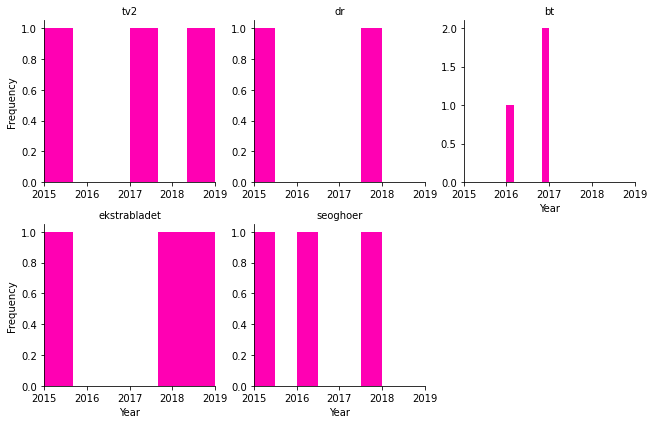

In [9]:
import seaborn as sns

# use seaborn's facetgrid to create a grid of histograms, with one histogram for each domain
g = sns.FacetGrid(data, col="domain", col_wrap=3, sharex=False, sharey=False)

# for each domain, create a histogram with the same bin edges
bins = len(set(data['year']))
g.map(plt.hist, "year", bins=bins, color="#FF00B3")

# adjust layout and show plot
g.set_titles("{col_name}")
g.set(xlim=(min(data['year']), max(data['year'])))
g.set_ylabels("Frequency")
g.set_xlabels("Year")
plt.show()

### Checking Year Distribution after Subsetting

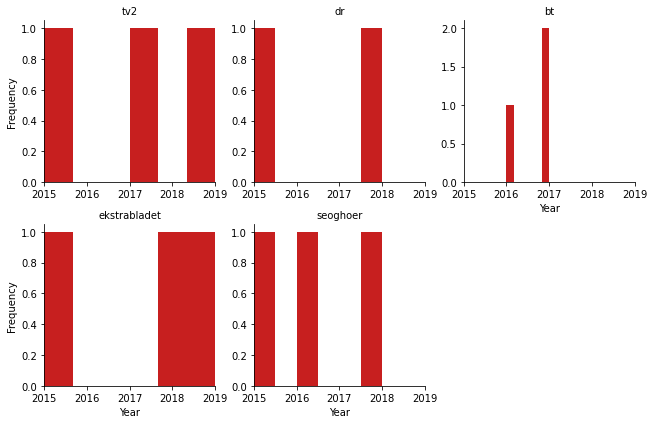

In [13]:
# use seaborn's facetgrid to create a grid of histograms, with one histogram for each domain
g = sns.FacetGrid(data, col="domain", col_wrap=3, sharex=False, sharey=False)

# for each domain, create a histogram with the same bin edges
bins = len(set(data['year']))
g.map(plt.hist, "year", bins=bins, color="#c71f1f")

# adjust layout and show plot
g.set_titles("{col_name}")
g.set(xlim=(min(data['year']), max(data['year'])))
g.set_ylabels("Frequency")
g.set_xlabels("Year")
plt.show()

BT is still of concern, it is kept in the data analysis. 

## Export Data as a CSV
For the sake of accessibility, we choose to export the data as a CSV rather than a zip-compressed JSONL again as CSV is a more common format. This is feasable with our preprocessed data as it has been reduced dramatically in size compared to the original DaNewsRoom

In [ ]:
data.to_csv("/content/drive/MyDrive/002 cultural-data-science/data/preprocessed-dummy-DaNewsRoom.csv")